In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Подготовка и преобразование данных для характеристики важнейших трендов
в современной энергетике

1.1. Урбанизация и энергетика

In [ ]:
# К диаграмме роста урбанизации (диаграмма 1)

# Загружаем датасет с данными о динамике населения городских и сельских районов

urban_rural = pd.read_csv('urban-and-rural-population.csv', sep=',')
urban_rural

,Entity,Code,Year,Urban population,Rural population
0,Afghanistan,AFG,1960,755835,8241132
1,Afghanistan,AFG,1961,796271,8373135
2,Afghanistan,AFG,1962,839385,8512057
3,Afghanistan,AFG,1963,885227,8657973
4,Afghanistan,AFG,1964,934134,8810638
...,...,...,...,...,...
15996,Zimbabwe,ZWE,2016,4531238,9499100
15997,Zimbabwe,ZWE,2017,4589452,9647147
15998,Zimbabwe,ZWE,2018,4650597,9788215
15999,Zimbabwe,ZWE,2019,4717307,9928166


In [ ]:
urban_rural['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
urban_rural['Entity'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Caribbean Small States', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
    

In [ ]:
# производим анализ на основе мировых данных

world_urban = urban_rural.loc[urban_rural['Entity'] == 'World'].drop('Code', 1)
world_urban

,Entity,Year,Urban population,Rural population
15757,World,1960,1019029723,2012175449
15758,World,1961,1047559112,2023066947
15759,World,1962,1079414304,2044148623
15760,World,1963,1114226228,2074403280
15761,World,1964,1149870744,2104220646
...,...,...,...,...
15813,World,2016,4035768126,3386902997
15814,World,2017,4115944438,3391638218
15815,World,2018,4195477234,3395164032
15816,World,2019,4274143015,3397375496


In [ ]:
# расчет процентных значений городского и сельского населения

def urban_percent(row):
    """
    function calculates percentage of urban population
    """
    return 100 * row['Urban population'] / (row['Urban population'] + row['Rural population'])

world_urban['urban_percent'] = world_urban.apply(urban_percent, axis=1)

def rural_percent(row):
    """
    function calculates percentage of rural population
    """
    return 100 -  row['urban_percent']

world_urban['rural_percent'] = world_urban.apply(rural_percent, axis=1)

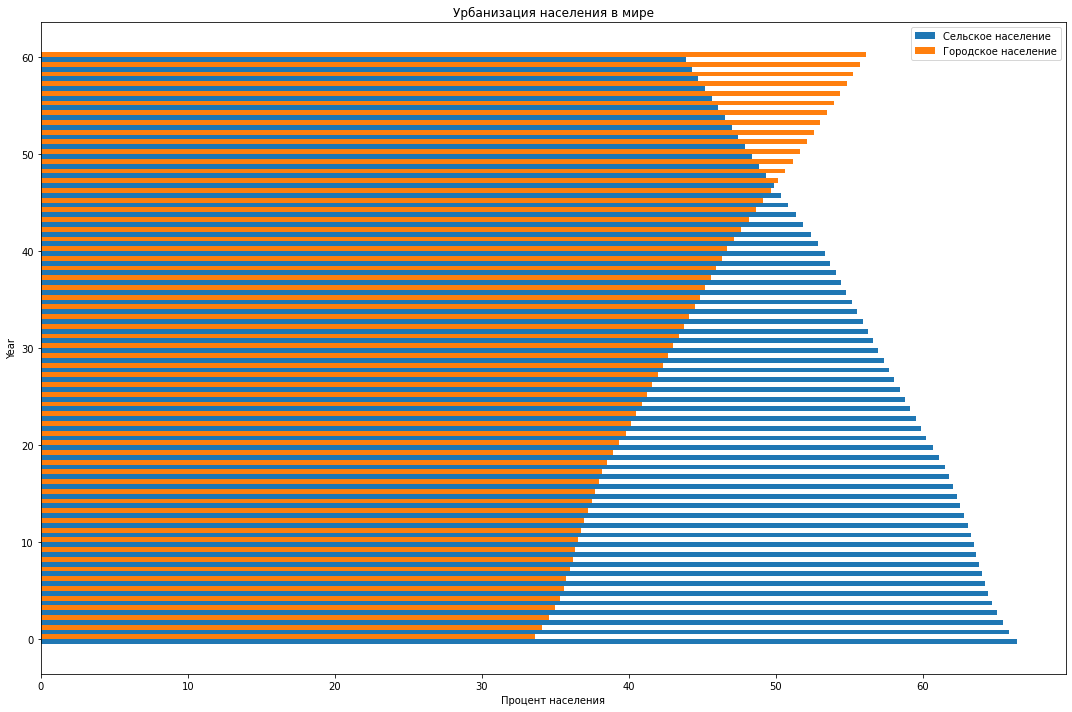

In [ ]:
# создание диаграммы соотношения городского и сельского населения в динамике (диаграмма 1)

labels = world_urban['Year']
rural_population = world_urban['rural_percent']
urban_population = world_urban['urban_percent']

# x = np.arange(world_urban['Year'].count())  
width = 0.5 

fig, ax = plt.subplots(figsize = (15, 10))
rural = ax.barh(x - width/2, rural_population, width, label='Сельское население')
urban = ax.barh(x + width/2, urban_population, width, label='Городское население')

ax.set_ylabel('Years')
ax.set_xlabel('Процент населения')
ax.set_title('Урбанизация населения в мире')
# ax.set_yticks(labels)
# ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

1.2. Динамика мирового энергопотребления

In [ ]:
# Диаграмма 2. Линейный график мирового потребления энергии 

# Загружаем датасет с глобальными данными о потреблении первичной энергии 

energy = pd.read_csv('energy.csv', sep=',')
energy

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,7.773
1,Afghanistan,AFG,1981,8.732
2,Afghanistan,AFG,1982,9.135
3,Afghanistan,AFG,1983,11.006
4,Afghanistan,AFG,1984,11.056
...,...,...,...,...
10129,Zimbabwe,ZWE,2012,55.756
10130,Zimbabwe,ZWE,2013,56.081
10131,Zimbabwe,ZWE,2014,56.084
10132,Zimbabwe,ZWE,2015,55.642


In [ ]:
world_consumption = energy.loc[energy['Entity'] == 'World']
world_consumption

,Entity,Code,Year,Primary energy consumption (TWh)
9956,World,OWID_WRL,1965,43247.517
9957,World,OWID_WRL,1966,45582.596
9958,World,OWID_WRL,1967,47298.513
9959,World,OWID_WRL,1968,50179.728
9960,World,OWID_WRL,1969,53571.509
9961,World,OWID_WRL,1970,56946.457
9962,World,OWID_WRL,1971,59265.924
9963,World,OWID_WRL,1972,62481.338
9964,World,OWID_WRL,1973,66078.908
9965,World,OWID_WRL,1974,66434.173


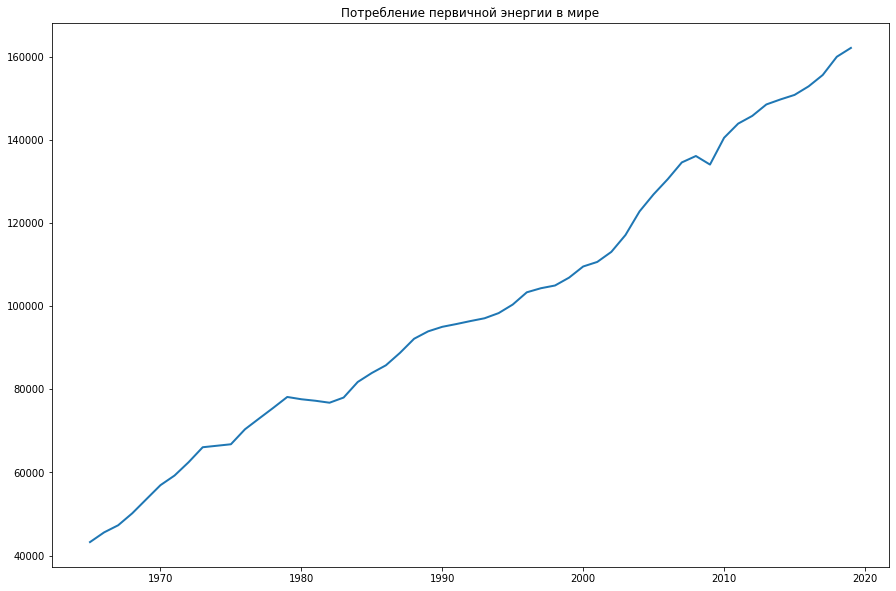

In [ ]:
x = world_consumption['Year']
y = world_consumption['Primary energy consumption (TWh)']

fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(x, y, linewidth=2.0)

ax.set_title('Потребление первичной энергии в мире')

plt.show()

1.3 - 1.4. Скорость глобального потепления и концентрация парниковых газов

In [ ]:
# К диаграмме 3. Линейный график и средняя температурной аномалии за все время наблюдений (с января 1880 года)

climate_change = pd.read_csv('climate-change.csv', sep=',')

In [ ]:
climate_change = climate_change.loc[climate_change['Entity'] == 'World']
climate_change

,Entity,Code,Day,temperature_anomaly
3404,World,OWID_WRL,1880-01-15,-0.18
3405,World,OWID_WRL,1880-02-15,-0.24
3406,World,OWID_WRL,1880-03-15,-0.08
3407,World,OWID_WRL,1880-04-15,-0.16
3408,World,OWID_WRL,1880-05-15,-0.09
...,...,...,...,...
5101,World,OWID_WRL,2021-06-15,0.85
5102,World,OWID_WRL,2021-07-15,0.92
5103,World,OWID_WRL,2021-08-15,0.82
5104,World,OWID_WRL,2021-09-15,0.92


Дополним линейный график абсолюных температурных аномалий графиком скользящей средней,
рассчитанной с 1981 года с периодом 12

In [ ]:
climate_change_1980 = climate_change.loc[climate_change['Day'] >= '1981-01-15']
climate_change_1980

,Entity,Code,Day,temperature_anomaly
4616,World,OWID_WRL,1981-01-15,0.53
4617,World,OWID_WRL,1981-02-15,0.42
4618,World,OWID_WRL,1981-03-15,0.48
4619,World,OWID_WRL,1981-04-15,0.32
4620,World,OWID_WRL,1981-05-15,0.25
...,...,...,...,...
5101,World,OWID_WRL,2021-06-15,0.85
5102,World,OWID_WRL,2021-07-15,0.92
5103,World,OWID_WRL,2021-08-15,0.82
5104,World,OWID_WRL,2021-09-15,0.92


In [ ]:
s = climate_change_1980['temperature_anomaly']
climate_change_1980['ma_anomaly'] = s.rolling(12).mean()
climate_change_1980

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Entity,Code,Day,temperature_anomaly,ma_anomaly
4616,World,OWID_WRL,1981-01-15,0.53,NaN
4617,World,OWID_WRL,1981-02-15,0.42,NaN
4618,World,OWID_WRL,1981-03-15,0.48,NaN
4619,World,OWID_WRL,1981-04-15,0.32,NaN
4620,World,OWID_WRL,1981-05-15,0.25,NaN
...,...,...,...,...,...
5101,World,OWID_WRL,2021-06-15,0.85,0.861667
5102,World,OWID_WRL,2021-07-15,0.92,0.862500
5103,World,OWID_WRL,2021-08-15,0.82,0.857500
5104,World,OWID_WRL,2021-09-15,0.92,0.851667


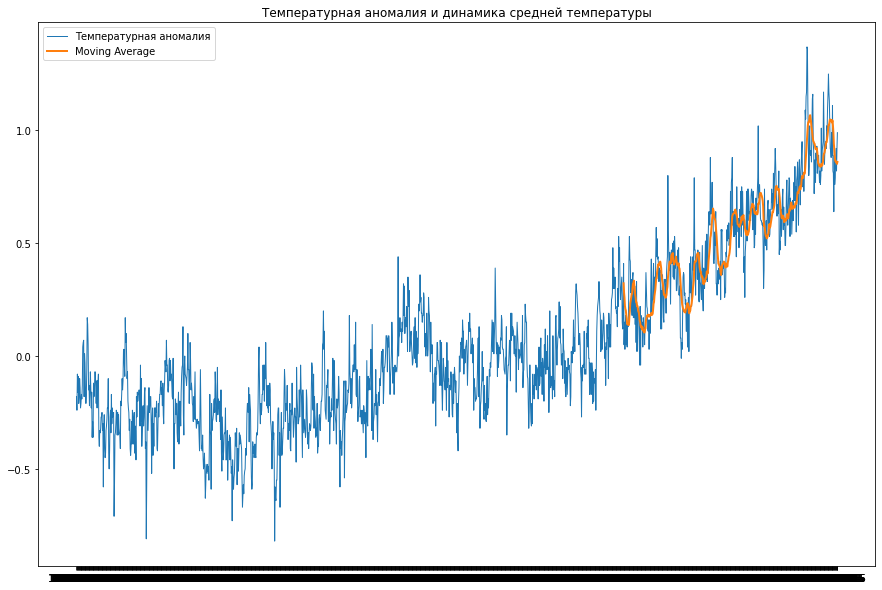

In [ ]:
# Диаграмма 3. Линейный график глобального изменения температуры и скользящей средней температурной аномалии

x = climate_change['Day']
y = climate_change['temperature_anomaly']

x_2 = climate_change_1980['Day']
y_2 = climate_change_1980['ma_anomaly']

fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(x, y, linewidth=1.0, label='Температурная аномалия')
ax.plot(x_2, y_2, linewidth=2.0, label='Moving Average')

ax.legend()

ax.set_title('Температурная аномалия и динамика средней температуры')

plt.show()

In [ ]:
# Диаграмма 4. Сравнительный график концентрации парниковых газов в атмосфере 

# концентрация двуокиси углерода в атмосфере

co_concentration = pd.read_csv('global-co-concentration-ppm.csv', sep=',')

# получаем данные позднее 1750 г.

co_concentration = co_concentration.loc[co_concentration['Year'] >= 1750]

In [ ]:
# концентрация метана в атмосфере

ch4_concentration = pd.read_csv('ch4-concentration-long.csv', sep=',')

In [ ]:
# концентрация N2O(закиси азота) в атмосфере

n2o_concentration = pd.read_csv('n2o-concentration-long.csv', sep=',')

Text(0.5, 1.0, 'Диоксид азота')

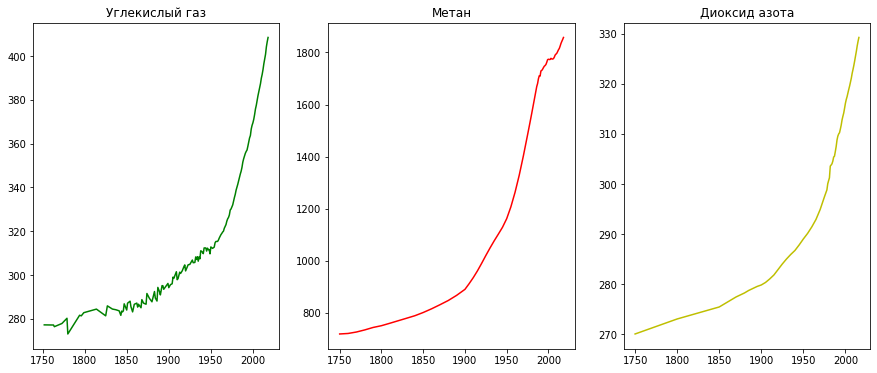

In [ ]:
# линейные графики концентрации парниковых газов в атмосфере

x = co_concentration['Year']
y = co_concentration['CO2 concentrations (NOAA, 2018)']

x2 = ch4_concentration['Year']
y2 = ch4_concentration['CH4 concentration (EEA & NOAA (2019))']

x3 = n2o_concentration['Year']
y3 = n2o_concentration['N2O concentrations (annual average) (EEA, 2019)']

fig, axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=3)
co = axes[0].plot(x, y, 'g-')
ch4 = axes[1].plot(x2, y2, 'r-')
n2o = axes[2].plot(x3, y3, 'y-')

axes[0].set_title('Углекислый газ')
axes[1].set_title('Метан')
axes[2].set_title('Диоксид азота')


1.5. Низкоуглеродная и возобновляемая энергия и энергия из ископаемых источников

Диаграмма 5. Корреляция между годовым изменением производства низкоуглеродной энергии
и возобновляемой энергии и годового изменением потребления ископаемого топлива

In [ ]:
# Годовое изменение производства низкоуглеродной энергии

low_carbon = pd.read_csv('annual-change-low-carbon-energy.csv', sep=',')

In [ ]:
# изучение датасета и выделение глобальных данных 

low_carbon['Entity'].unique()

array(['Africa', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia',
       'Europe', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'North America',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United A

In [ ]:
low_carbon['Year'].unique()

array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
world_low_carbon = low_carbon.loc[low_carbon['Entity'] == 'World']
world_low_carbon = world_low_carbon[['Year',	'Low-carbon energy (TWh growth – sub method)']]
world_low_carbon 

,Year,Low-carbon energy (TWh growth – sub method)
4153,1966,198.149
4154,1967,79.664
4155,1968,185.520
4156,1969,203.507
4157,1970,201.197
4158,1971,237.314
4159,1972,283.429
4160,1973,200.871
4161,1974,535.633
4162,1975,337.216


In [ ]:
# годовое изменение производства возобновляемой энергии

# аналогично работаем с датасетом по возобновляемой энергии

renewables = pd.read_csv('annual-change-renewables.csv', sep=',')

In [ ]:
world_renewables = renewables.loc[renewables['Entity'] == 'World']
world_renewables = world_renewables[['Year',	'Renewables (TWh growth – sub method)']]
world_renewables

,Year,Renewables (TWh growth – sub method)
4153,1966,173.444
4154,1967,61.406
4155,1968,154.666
4156,1969,176.645
4157,1970,153.721
4158,1971,151.676
4159,1972,165.454
4160,1973,57.186
4161,1974,361.471
4162,1975,50.415


In [ ]:
# годовое изменение потребления ископаемого топлива

# и аналогично с датасетом по ископаемому топливу

fossil_fuels = pd.read_csv('annual-change-fossil-fuels.csv', sep=',')
fossil_fuels

,Entity,Code,Year,Fossil fuels (TWh growth – sub method)
0,Africa,NaN,1966,31.561
1,Africa,NaN,1967,4.169
2,Africa,NaN,1968,32.926
3,Africa,NaN,1969,10.075
4,Africa,NaN,1970,57.013
...,...,...,...,...
4196,World,OWID_WRL,2015,553.902
4197,World,OWID_WRL,2016,1189.562
4198,World,OWID_WRL,2017,1806.839
4199,World,OWID_WRL,2018,3294.567


In [ ]:
world_fossil_fuels = fossil_fuels.loc[fossil_fuels['Entity'] == 'World']
world_fossil_fuels = world_fossil_fuels[['Year', 'Fossil fuels (TWh growth – sub method)']]
world_fossil_fuels

,Year,Fossil fuels (TWh growth – sub method)
4147,1966,2136.740
4148,1967,1636.070
4149,1968,2695.515
4150,1969,3188.095
4151,1970,3172.426
4152,1971,2081.533
4153,1972,2930.663
4154,1973,3397.052
4155,1974,-179.967
4156,1975,23.304


In [ ]:
# слияние получившихся датафреймов по различным видам энергии

merged_data = world_fossil_fuels.merge(world_low_carbon, how='inner', on='Year').merge(world_renewables, how='inner', on='Year')
merged_data = merged_data.rename(columns={'Fossil fuels (TWh growth – sub method)': 'Fossil fuels', 'Low-carbon energy (TWh growth – sub method)': 'Low-carbon energy',
                            'Renewables (TWh growth – sub method)': 'Renewables'})

In [ ]:
merged_data.columns
merged_data = merged_data[['Fossil fuels', 'Low-carbon energy', 'Renewables']]

In [ ]:
# для изучения взаимозависимости между различными видами энергии 
# используем функцию попарной корреляции

corr = merged_data.corr(method='spearman')
corr

,Fossil fuels,Low-carbon energy,Renewables
Fossil fuels,1.000000,-0.059653,0.080465
Low-carbon energy,-0.059653,1.000000,0.658243
Renewables,0.080465,0.658243,1.000000


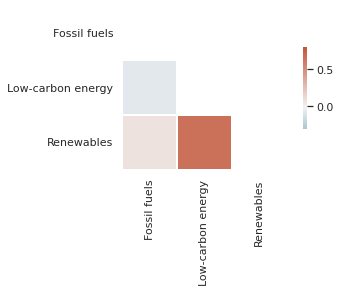

In [ ]:
# Диаграмма 5. Корреляция между годовым изменением производства низкоуглеродной энергии
# и возобновляемой энергии и годового изменением потребления ископаемого топлива

# с помощью тепловой карты библиотеки seaborn визуализируем полученные результаты функции корреляции

sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(6, 3))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



Созданная корреляционная матрица и ее визуализация показывает,
что существует достаточно большая корреляция между процессами
производства низкоуглеродной энергии и возобновляемой энергии 
(что и понятно, поскольку их источники во-многом совпадают).
Но особенно важно то, что обнаружена пусть и небольшая, но отрицательная корреляция
между потреблением ископаемого топлива и производством низкоуглеродной энергии. 

2. Исследование показателей национальной энергетики (на примере Испании)

2.1. Оценка климатических условий Испании

Создание датафрейма weather с данными о погоде в пяти крупнейших городах Испании,
полученного из набора данных “Hourly energy demand generation and weather. 
Electrical demand, generation by type, prices and weather in Spain”:

In [ ]:
weather = pd.read_csv('weather_features.csv', sep=',')
# weather

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

Расчет показателя среднегодовой температуры в Испании
Принцип расчета: группируем по 5 представленным городам, агрегируем данные по среднему, 
суммируем средние показатели по городам и приводим их к среднему:

In [ ]:
weather['city_name'].value_counts()

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64

In [ ]:
weather_grp = weather.groupby(by='city_name').mean()
weather_grp

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Barcelona,289.848248,288.594704,291.021987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465
Bilbao,286.378489,284.916661,288.036687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228
Madrid,288.061071,286.824877,289.155600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Seville,293.105431,291.184103,295.962431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849
Valencia,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


In [ ]:
round((weather_grp.sum() / 5), 2)


temp           289.63
temp_min       288.35
temp_max       291.11
pressure      1069.58
humidity        68.43
wind_speed       2.47
wind_deg       166.58
rain_1h          0.08
rain_3h          0.00
snow_3h          0.00
clouds_all      25.03
weather_id     759.95
dtype: float64

формула перевода температуры в кельвинах в градусы Цельсия: T=t+T0, 
где T - температура в кельвинах, t - температура в градусах Цельсия, T0=273,15 Кельвина

среднегодовая температура в Испании (на основе измерения в 5 крупных городах):
mean_temp = round(289.63 - 273.15, 2)
mean_temp = 16.48

Показатели облачности

Принцип расчета: количество часов ясного неба и небольшой облачности приведенное к общему времени наблюдений

In [ ]:
weather['weather_description'].value_counts()

sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity shower rain             476
haze                              435
shower rain                       426
drizzle                           369
dust                              345
thunderstorm                      309
light snow                        140
thunderstorm with rain            127
thunderstorm with light rain       92
heavy intensity shower rain        81
light intensity drizzle rain       79
very heavy rain                    78
snow                               74
smoke       

Процент ясных и малооблачных дней в году:

определяем в результатах функции .value_counts()
время, характеризуемое малооблачной или ясной погодой
и приводим к общему времени измерений

In [ ]:
clear_sky_time = 100 * 82685 / 178396 # количество значений sky is clear приводим к общему времени измерений
round(clear_sky_time, 2)
# good_weather_time = 100 * (32101+17448+15945) / 178396 # сумма малооблачных часов few clouds, broken clouds, scattered clouds приводим к общему времени измерений
print(round(clear_sky_time, 2) + round(good_weather_time, 2)) # сумма процентов ясных и малооблачных часов

83.06


2.2. Обработка данных о показателях электроэнергетики в Испании

Создание и подготовка датафрейма energy_spain, полученного из набора данных 
“Hourly energy demand generation and weather. 
Electrical demand, generation by type, prices and weather in Spain”, к работе

In [ ]:
energy_spain = pd.read_csv('energy_dataset.csv', sep=',')
energy_spain 

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


Проводим предварительный анализ данных, проверяем их качество, аномалии, пропуски

In [ ]:
energy_spain.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [ ]:
energy_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Освободимся от столбцов с полностью отсутствующими значениями:

In [ ]:
energy_spain.columns
energy_spain = energy_spain[['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual']]

In [ ]:
# посмотрим на оставшиеся пропуски:

null_data = energy_spain[energy_spain.isnull().any(axis=1)]
# null_data

Приводим часовые данные к дням, месяцам и годам для группировки:

In [ ]:
from datetime import datetime

def days(newstring):
    """
    Return a datetime corresponding to date_string, parsed according to format: %Y-%m-%d
    """
    return datetime.strptime(newstring, '%Y-%m-%d %H:%M:%S%z').strftime('%Y-%m-%d')

def months(newstring):
    """
    Return a datetime corresponding to date_string, parsed according to format: %Y-%m
    """
    return datetime.strptime(newstring, '%Y-%m-%d %H:%M:%S%z').strftime('%Y-%m')

def years(newstring):
    """
    Return a datetime corresponding to date_string, parsed according to format: %Y
    """
    return datetime.strptime(newstring, '%Y-%m-%d %H:%M:%S%z').strftime('%Y')

на какие дни приходится наибольшее количество отсутствующих значений:

In [ ]:
null_data['day'] = null_data['time'].apply(days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
null_data.groupby('day').count()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
day,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,1,7,7
2015-01-19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2
2015-01-27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
2015-01-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1
2015-02-01,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,11
2015-04-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
2015-04-16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1
2015-04-20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
2015-04-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1


Отсутствующие значения все еще остаются в датафрейме, при этом количество строк к отсутствующими значениями составляет 0,13% к общему числу строк датафрейма
поскольку наши данные, возможно, подчиняются определенным трендовым и сезонным зависимостям, а механизм формирования пропусков - случаен, полагаем, 
что наилучшим способом обработки отсутствующих данных станет замена каждого из них предыдущим значением:

In [ ]:
energy_spain.fillna(method='backfill', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
energy_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation fossil oil shale                  35064 non-null  float64
 7   generation fossil peat                       35064 non-null  float64
 8   generation geothermal                        35064 non-null  float64
 9   generation hydro pumped storage consumption  35064 non-null  float64
 10

2.2.1. Влияние внешних факторов, представленных в доступных нам данных, на потребление энергии

К диаграмме 8. Существует ли зависимость между погодными условиями и уровнем потребления энергии?

группируем данные по дню, месяцу, году:

In [ ]:
energy_spain['day'] = energy_spain['time'].apply(days)
energy_spain['month'] = energy_spain['time'].apply(months)
energy_spain['year'] = energy_spain['time'].apply(years)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
day_energy = energy_spain.groupby('day').sum().reset_index()
day_energy

,day,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01,10284.0,6178.0,102162.0,101917.0,3845.0,0.0,0.0,0.0,25690.0,25149.0,52005.0,0.0,170328.0,1014.0,1775.0,27443.0,4852.0,0.0,89002.0,25200.0,87725.0,592887.0,573522.0,1120.86,1491.57
1,2015-01-02,9247.0,0.0,84976.0,29688.0,4767.0,0.0,0.0,0.0,37048.0,31045.0,89159.0,0.0,170540.0,1062.0,1473.0,30053.0,4446.0,0.0,269409.0,28496.0,270825.0,661452.0,654031.0,396.74,1663.85
2,2015-01-03,10572.0,0.0,82663.0,32262.0,5438.0,0.0,0.0,0.0,32123.0,32994.0,95266.0,0.0,170289.0,1873.0,1598.0,26871.0,4895.0,0.0,220018.0,26619.0,219471.0,612862.0,602656.0,619.18,1576.96
3,2015-01-04,9531.0,0.0,83270.0,53879.0,8530.0,0.0,0.0,0.0,14160.0,35886.0,77792.0,0.0,170007.0,2009.0,1379.0,57660.0,3823.0,0.0,193576.0,55194.0,193791.0,652361.0,650703.0,716.96,1398.34
4,2015-01-05,8687.0,430.0,106664.0,60755.0,7806.0,0.0,0.0,0.0,29266.0,28110.0,58673.0,0.0,93149.0,970.0,1746.0,36695.0,3619.0,0.0,177505.0,41685.0,185821.0,537711.0,537398.0,931.46,1789.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2018-12-27,7304.0,16761.0,233859.0,69578.0,7141.0,0.0,0.0,0.0,3354.0,28508.0,91163.0,0.0,145582.0,1483.0,2206.0,16162.0,7134.0,0.0,26850.0,16986.0,31481.0,691922.0,684773.0,1623.23,1752.71
1457,2018-12-28,7595.0,15748.0,193459.0,66650.0,6576.0,0.0,0.0,0.0,1944.0,27639.0,60629.0,0.0,145742.0,1437.0,2339.0,13224.0,7360.0,0.0,93264.0,17853.0,96193.0,684905.0,687306.0,1530.85,1666.97
1458,2018-12-29,6951.0,113.0,119564.0,41612.0,6124.0,0.0,0.0,0.0,14454.0,26889.0,43773.0,0.0,145737.0,1444.0,2410.0,18126.0,7458.0,0.0,172132.0,16159.0,159958.0,635083.0,639282.0,1369.16,1501.07
1459,2018-12-30,6609.0,0.0,126469.0,36607.0,5372.0,0.0,0.0,0.0,14897.0,25595.0,46509.0,0.0,145712.0,1419.0,2374.0,25256.0,7476.0,0.0,120359.0,24516.0,121885.0,607292.0,606334.0,1403.85,1548.59


In [ ]:
month_energy = energy_spain.groupby('month').sum().reset_index()
month_energy

,month,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01,359146.0,423283.0,3610233.0,4013797.0,228029.0,0.0,0.0,0.0,549550.0,765843.0,1920012.0,0.0,4939108.0,51949.0,52607.0,851113.0,169770.0,0.0,5645792.0,835405.0,5649598.0,22409901.0,22274863.0,35282.79,48322.07
1,2015-02,315941.0,210617.0,3141019.0,2718895.0,214529.0,0.0,0.0,0.0,489748.0,779725.0,2494928.0,0.0,4489715.0,53361.0,47386.0,836321.0,143689.0,0.0,5195774.0,811219.0,5190205.0,19901722.0,19851283.0,29701.87,37889.95
2,2015-03,347803.0,181617.0,3428761.0,3145727.0,237265.0,0.0,0.0,0.0,444996.0,872415.0,2289644.0,0.0,4969120.0,55558.0,49508.0,953625.0,131601.0,0.0,5013674.0,983312.0,4988962.0,21095918.0,21128824.0,34615.72,41253.19
3,2015-04,306913.0,334399.0,3567639.0,3471366.0,244038.0,0.0,0.0,0.0,350122.0,724152.0,1815749.0,0.0,4370064.0,43114.0,50197.0,1051194.0,138450.0,0.0,3957593.0,1043535.0,3954998.0,19766538.0,19758361.0,35179.07,42014.94
4,2015-05,374656.0,278465.0,3285020.0,2990592.0,247430.0,0.0,0.0,0.0,396297.0,668236.0,2081849.0,0.0,4020440.0,61176.0,52501.0,1428683.0,151017.0,0.0,5027512.0,1417081.0,5032248.0,20483590.0,20436308.0,33868.57,42626.78
5,2015-06,349922.0,479228.0,3553776.0,4470001.0,229844.0,0.0,0.0,0.0,281110.0,625956.0,1824323.0,0.0,4074047.0,58504.0,47163.0,1438870.0,180494.0,0.0,3148415.0,1424768.0,3153046.0,20138347.0,20198152.0,38235.64,47501.93
6,2015-07,381291.0,509060.0,4857941.0,5020861.0,268014.0,0.0,0.0,0.0,232892.0,550493.0,1794919.0,0.0,4823816.0,60968.0,50834.0,1468463.0,181146.0,0.0,2942709.0,1481945.0,2932964.0,22744450.0,22692839.0,42897.70,52877.60
7,2015-08,386097.0,435811.0,3660102.0,4359372.0,240992.0,0.0,0.0,0.0,425290.0,523919.0,1460519.0,0.0,4789757.0,60857.0,50723.0,1293779.0,173274.0,0.0,3612993.0,1302258.0,3612031.0,20641672.0,20626162.0,39273.72,47614.56
8,2015-09,372317.0,394620.0,3655139.0,4070789.0,247314.0,0.0,0.0,0.0,315830.0,522576.0,1628033.0,0.0,4655646.0,57688.0,48936.0,1145729.0,171261.0,0.0,3113136.0,1122557.0,3121932.0,20028356.0,19971006.0,37051.70,43383.45
9,2015-10,387015.0,393784.0,3898480.0,4314903.0,240998.0,0.0,0.0,0.0,306017.0,523429.0,1699628.0,0.0,4362436.0,62859.0,52651.0,807753.0,177624.0,0.0,3423783.0,810352.0,3425712.0,20622886.0,20596972.0,39015.60,44258.04


In [ ]:
year_energy = energy_spain.groupby('year').sum().reset_index()
year_energy

,year,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015,4303718.0,4509108.0,44306240.0,46847338.0,2893680.0,0.0,0.0,0.0,4671656.0,7659253.0,22191913.0,0.0,54725010.0,682623.0,606422.0,12769878.0,1954211.0,0.0,47991205.0,12721162.0,47965751.0,248830153.0,248479183.0,440845.58,537520.71
1,2016,3210501.0,3343682.0,45170049.0,32089098.0,2513404.0,0.0,0.0,0.0,4970920.0,8980490.0,29711742.0,0.0,56025940.0,529509.0,708332.0,12347944.0,2268253.0,0.0,47572621.0,12412205.0,47602173.0,250474266.0,250410710.0,348437.39,416688.09
2,2017,2982558.0,4768099.0,56709615.0,37966977.0,2581851.0,0.0,0.0,0.0,3664273.0,6731314.0,14046088.0,0.0,55592146.0,431583.0,830384.0,13097815.0,2607498.0,0.0,47129965.0,13104794.0,47159949.0,252821023.0,252801389.0,457615.89,519707.50
3,2018,2951315.0,3091192.0,50968296.0,32346921.0,2472182.0,0.0,0.0,0.0,3369639.0,10718075.0,25412038.0,0.0,53279041.0,468072.0,857544.0,12025189.0,2616917.0,0.0,48925545.0,12221275.0,49114869.0,254636683.0,254608848.0,501895.04,555729.08


Диаграмма 6. Дневное потребление энергии и 30-дневная скользящая средняя дневного потребления

эту задачу будем решать на дневном таймфрейме

построим линейный график дневного потребления энергии


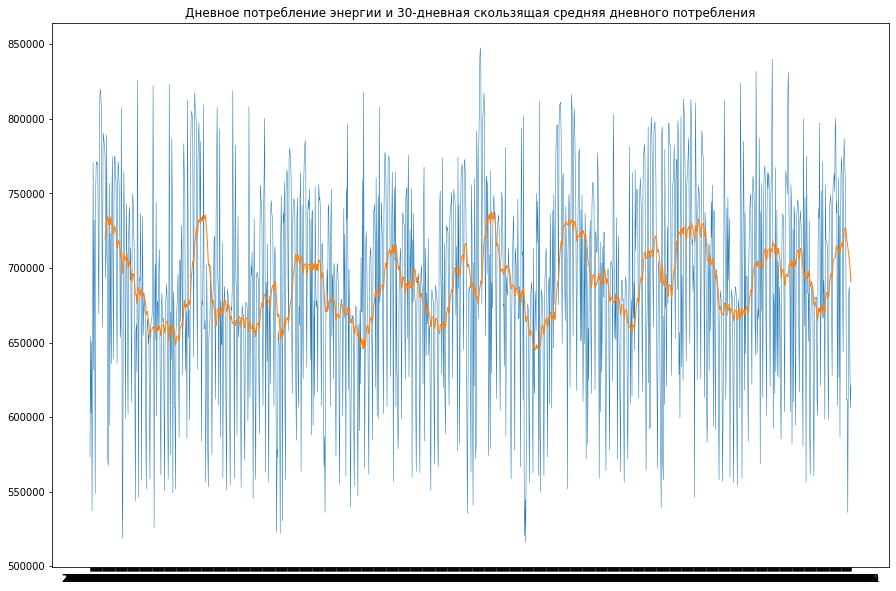

In [ ]:
x = day_energy['day']
y = day_energy['total load actual']

ma = day_energy['total load actual'].rolling(30).mean()

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x, y, linewidth=0.5)
ax.plot(x, ma, linewidth=1.0)

ax.set_title('Дневное потребление энергии и 30-дневная скользящая средняя дневного потребления')
plt.show()


На графике видно, что в основном дневное потребление энергии колеблется в диапазоне 600000 - 800000
без выраженного тренда, но с определенной сезонностью
 
влияют ли внешние факторы (в виде погоды) на величину энергопотребления?

для упрощения анализа будем исходить из посылки, что наиболее подходящим погодным фактором
динамики дневного потребления энергии является температура. С теж же позиций выберем 
показатели погоды центрально размещенного на Пиренейском полуострове Мадрида.

In [ ]:
# выделим основные показатели для анализа, объединим датафреймы:

day_total_load = day_energy[['day', 'total load actual']]
day_total_load

,day,total load actual
0,2015-01-01,573522.0
1,2015-01-02,654031.0
2,2015-01-03,602656.0
3,2015-01-04,650703.0
4,2015-01-05,537398.0
...,...,...
1456,2018-12-27,684773.0
1457,2018-12-28,687306.0
1458,2018-12-29,639282.0
1459,2018-12-30,606334.0


In [ ]:
weather['day'] = weather['dt_iso'].apply(days)

In [ ]:
# выделим температурные данные по Мадриду, рассчитаем среднюю температуру по дню

madrid = weather.loc[weather['city_name'] == 'Madrid']

In [ ]:
day_madrid = madrid.groupby('day').mean().reset_index()

In [ ]:
madrid_temp = day_madrid[['day', 'temp']]
madrid_temp

,day,temp
0,2015-01-01,272.184819
1,2015-01-02,272.430021
2,2015-01-03,273.765677
3,2015-01-04,274.475979
4,2015-01-05,274.402960
...,...,...
1456,2018-12-27,277.625000
1457,2018-12-28,278.630833
1458,2018-12-29,279.380000
1459,2018-12-30,278.813750


In [ ]:
# объединив датафреймы общего потребления и температуры в Мадриде, рассчитаем корреляцию

load_corr = day_total_load.merge(madrid_temp, how='inner', on='day')
load_corr

,day,total load actual,temp
0,2015-01-01,573522.0,272.184819
1,2015-01-02,654031.0,272.430021
2,2015-01-03,602656.0,273.765677
3,2015-01-04,650703.0,274.475979
4,2015-01-05,537398.0,274.402960
...,...,...,...
1456,2018-12-27,684773.0,277.625000
1457,2018-12-28,687306.0,278.630833
1458,2018-12-29,639282.0,279.380000
1459,2018-12-30,606334.0,278.813750


In [ ]:
load_corr['total load actual'].corr(load_corr['temp'], method='pearson')

-0.005594421942787142

вычисленный коэффициент корреляции показывает, что корреляции
между колебаниями температуры в Мадриде и общим потреблением энергии нет

для большей уверенности в выводе представим сравнение линейных графиков температуры и энергопотребления:

диаграмма 7. Существует ли зависимость между погодными условиями и уровнем потребления энергии

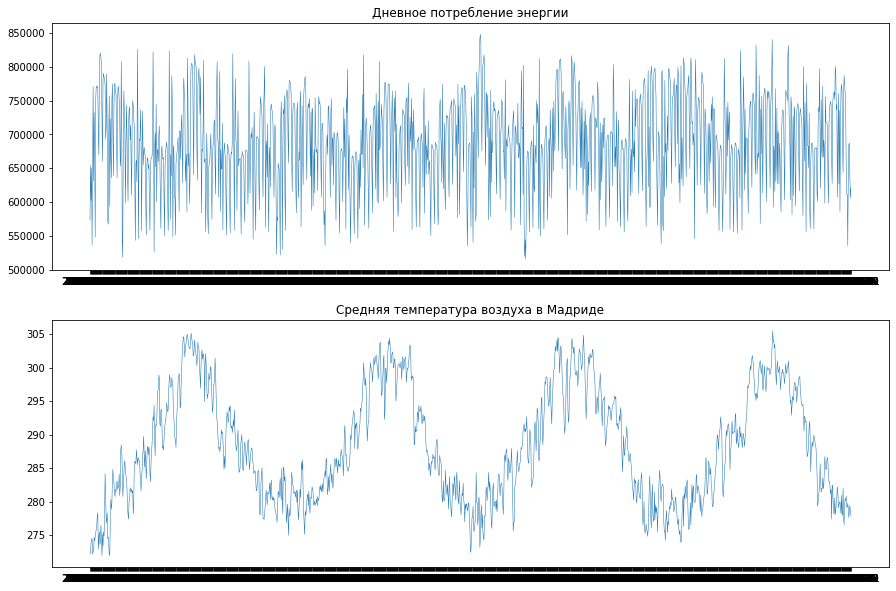

In [ ]:
x = load_corr['day']
y = load_corr['total load actual']
z = load_corr['temp']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

axes[0].plot(x, y, linewidth=0.5)
axes[1].plot(x, z, linewidth=0.5)

axes[0].set_title('Дневное потребление энергии')
axes[1].set_title('Средняя температура воздуха в Мадриде')

plt.show()


видим, что линейный график температуры очень четко характеризуется сезонностью, 
но это практически не отражается в колебаниях энергопотребления

2.2.2. Источники покрытия пиковых нагрузок

In [ ]:
# day_energy.columns
source_types = [ 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation fossil oil shale',
       'generation fossil peat', 'generation geothermal',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore']

corr_list = []

for stype in source_types:
    coef = day_energy['total load actual'].corr(day_energy[stype], method='pearson')
    corr_list.append(coef)

print(corr_list)

[0.09928841963690631, 0.33886088859404007, 0.5003213410162036, 0.43879906571483435, 0.5630417697599751, nan, nan, nan, -0.4059084188467941, 0.03156682689163082, 0.2106400905812077, nan, 0.1453370527681702, 0.10638404747006351, 0.15496926349885445, -0.052128693370285833, 0.1356993837079303, nan, 0.07879320872277724]


мы получили значения коэффициента корреляции отдельных видов генераций(источников энергии) и общего потребления.
Из этих данных создадим датафрейм и определим наиболее гибкие к изменению уровня потребления источники энергии:

In [ ]:
data = {'source': source_types, 'corr_coef': corr_list}

source_answer = pd.DataFrame(data)
source_answer = source_answer.dropna()
source_answer = source_answer.sort_values(['corr_coef'], ascending=False)
source_answer

,source,corr_coef
4,generation fossil oil,0.563042
2,generation fossil gas,0.500321
3,generation fossil hard coal,0.438799
1,generation fossil brown coal/lignite,0.338861
10,generation hydro water reservoir,0.210640
14,generation other renewable,0.154969
12,generation nuclear,0.145337
16,generation waste,0.135699
13,generation other,0.106384
0,generation biomass,0.099288


мы используем достаточно грубые оценки вклада отдельных видов генерации в изменение энергопотребления
(необходимо более точно рассчитывать веса)

для большей наглядности отсечем небольшие значения коэффициента корреляции 
возьмем за пороговое значение > 0,33, что математически никак не мотивировано

отфильтруем виды генерации в соответствии с этим пороговым значением

в датафрейме day_energy выделим значения потребления > 800000

построим диаграмму рассеяния общего потребления и источников энергии для
визуального представления того, какие источники имеют большую гибкость для
быстрого увеличения мощности генерации

In [ ]:
day_energy_trunc = day_energy.loc[day_energy['total load actual'] > 800000]
day_energy_trunc = day_energy_trunc[['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'total load actual']]
day_energy_trunc


,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,total load actual
19,21633.0,179451.0,186847.0,7598.0,816890.0
20,21437.0,134251.0,178258.0,7868.0,819827.0
21,19935.0,126376.0,171801.0,7841.0,814048.0
22,18771.0,122152.0,173501.0,8069.0,802958.0
60,0.0,109741.0,117593.0,7392.0,807526.0
91,0.0,116493.0,116360.0,7397.0,825753.0
121,2461.0,122113.0,120227.0,8011.0,822173.0
152,7274.0,143616.0,134291.0,8362.0,823236.0
187,16109.0,197787.0,189198.0,9367.0,812407.0
194,22909.0,196283.0,173287.0,9422.0,800423.0


In [ ]:
day_energy_trunc.count()

generation fossil brown coal/lignite    55
generation fossil gas                   55
generation fossil hard coal             55
generation fossil oil                   55
total load actual                       55
dtype: int64

Диаграмма 8. Источники покрытия пиковых нагрузок

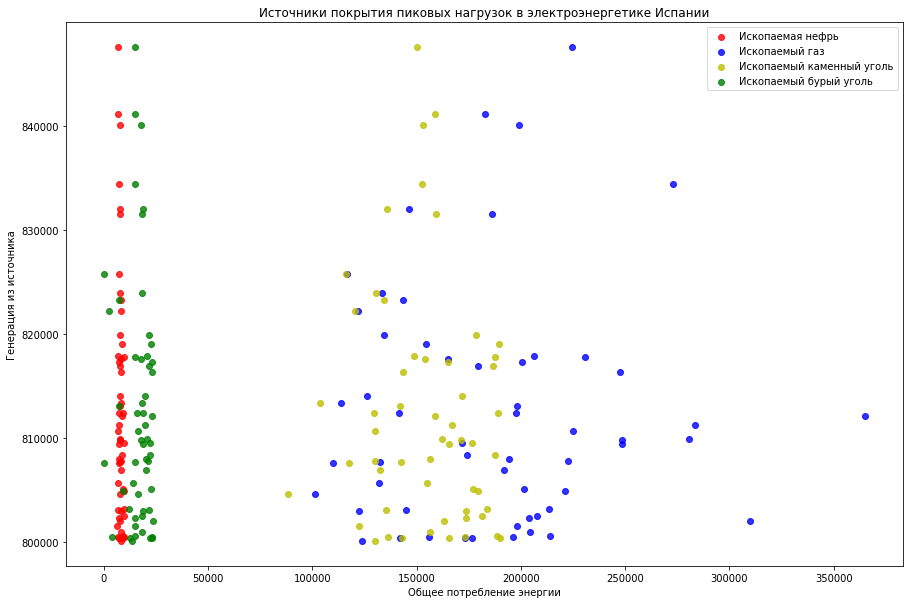

In [ ]:
x = day_energy_trunc['generation fossil oil']
x_2 = day_energy_trunc['generation fossil gas']
x_3 = day_energy_trunc['generation fossil hard coal']
x_4 = day_energy_trunc['generation fossil brown coal/lignite']

y = day_energy_trunc['total load actual']

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(x, y, c='r', alpha=0.8, label='Ископаемая нефрь')
ax.scatter(x_2, y, c='b', alpha=0.8, label='Ископаемый газ')
ax.scatter(x_3, y, c='y', alpha=0.8, label='Ископаемый каменный уголь')
ax.scatter(x_4, y, c='g', alpha=0.8, label='Ископаемый бурый уголь')

ax.set_ylabel('Генерация из источника')
ax.set_xlabel('Общее потребление энергии')

ax.legend()

ax.set_title('Источники покрытия пиковых нагрузок в электроэнергетике Испании')

plt.show()

визуализация показывает нам, что рост общего потребления энергии и покрытие пиковых нагрузок достигается,
за счет в основном ископаемого газа. На диаграмме видно, что использование ископаемого угля также колеблется 
в более широком диапазоне в сравнении с другими источниками, но его влияние на общее потребление более стабильно

2.2.3. Структура источников электроэнергии и прогноз будущей структуры источников

In [ ]:
# сгруппируем годовые измерения по критерию высокоуглеродные / низкоуглеродные источники энергии:

year_energy['high_carbon'] =year_energy[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation fossil oil shale',
       'generation fossil peat']].sum(axis=1)
year_energy['low_carbon'] = year_energy[['generation geothermal',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore']].sum(axis=1)
year_energy

,year,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,high_carbon,low_carbon
0,2015,4303718.0,4509108.0,44306240.0,46847338.0,2893680.0,0.0,0.0,0.0,4671656.0,7659253.0,22191913.0,0.0,54725010.0,682623.0,606422.0,12769878.0,1954211.0,0.0,47991205.0,12721162.0,47965751.0,248830153.0,248479183.0,440845.58,537520.71,102860084.0,153252171.0
1,2016,3210501.0,3343682.0,45170049.0,32089098.0,2513404.0,0.0,0.0,0.0,4970920.0,8980490.0,29711742.0,0.0,56025940.0,529509.0,708332.0,12347944.0,2268253.0,0.0,47572621.0,12412205.0,47602173.0,250474266.0,250410710.0,348437.39,416688.09,86326734.0,163115751.0
2,2017,2982558.0,4768099.0,56709615.0,37966977.0,2581851.0,0.0,0.0,0.0,3664273.0,6731314.0,14046088.0,0.0,55592146.0,431583.0,830384.0,13097815.0,2607498.0,0.0,47129965.0,13104794.0,47159949.0,252821023.0,252801389.0,457615.89,519707.50,105009100.0,144131066.0
3,2018,2951315.0,3091192.0,50968296.0,32346921.0,2472182.0,0.0,0.0,0.0,3369639.0,10718075.0,25412038.0,0.0,53279041.0,468072.0,857544.0,12025189.0,2616917.0,0.0,48925545.0,12221275.0,49114869.0,254636683.0,254608848.0,501895.04,555729.08,91829906.0,157672060.0


In [ ]:
high_low_carbon = year_energy[['year', 'high_carbon', 'low_carbon']]


высчитаем процентное значение высокоуглеродных/низкоуглеродных источников
в общем объеме генерации в 2015-2018 гг.

In [ ]:
def high_percent(row):
    """
    function calculates percentage of high_carbon
    """
    return round(100 * row['high_carbon'] / (row['high_carbon'] + row['low_carbon']), 2)

high_low_carbon['high_percent'] = high_low_carbon.apply(high_percent, axis=1)

def low_percent(row):
    """
    function calculates percentage of rural population
    """
    return 100 -  row['high_percent']

high_low_carbon['low_percent'] = high_low_carbon.apply(low_percent, axis=1)

high_low_carbon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,year,high_carbon,low_carbon,high_percent,low_percent
0,2015,102860084.0,153252171.0,40.16,59.84
1,2016,86326734.0,163115751.0,34.61,65.39
2,2017,105009100.0,144131066.0,42.15,57.85
3,2018,91829906.0,157672060.0,36.81,63.19


Диаграмма 9. Доли высокоуглеродных и низкоуглеродных источников энергии в общей генерации в 2015-2018 гг.

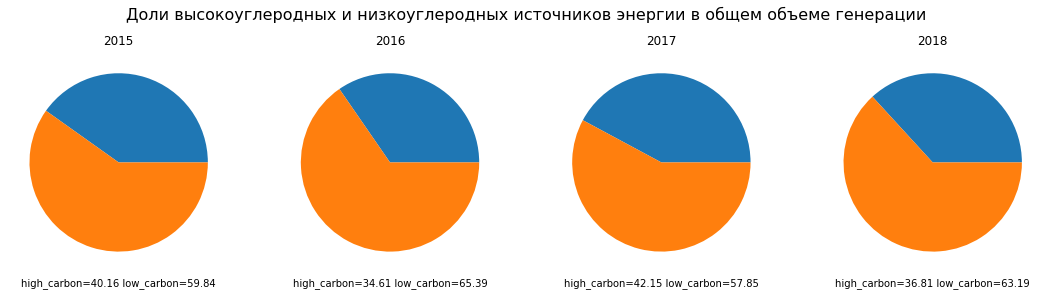

In [ ]:
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=4, constrained_layout=True, sharey=True)

fig.suptitle('Доли высокоуглеродных и низкоуглеродных источников энергии в общем объеме генерации', fontsize=16)

for i, row in high_low_carbon.iterrows():
    label=f'high_carbon={row["high_percent"]} low_carbon={row["low_percent"]}'
    axes[i].pie(row.loc[['high_carbon', 'low_carbon']])
    axes[i].set_xlabel(label)
    axes[i].set_title(row.loc['year'])


2.2.4. Биржевой индикатор Аллигатор Б.Вильямса для прогноза будущей структуры энергетики в Испании

Не получив положительного результата, попробуем предложить
специфический способ предсказания будущего развития испанской энергетики,
заимствованный из технического анализа биржевых инструментов - индикатор Билла Вильямса "Аллигатор".

Анализ также будем проводить в отношении двух групп источников и на двух таймфреймах: дневном и месячном

In [ ]:
month_energy['high_carbon'] = month_energy[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation fossil oil shale',
       'generation fossil peat']].sum(axis=1)
month_energy['low_carbon'] = month_energy[['generation geothermal',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore']].sum(axis=1)

In [ ]:
day_energy['high_carbon'] = day_energy[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation fossil oil shale',
       'generation fossil peat']].sum(axis=1)
day_energy['low_carbon'] = day_energy[['generation geothermal',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore']].sum(axis=1)

In [ ]:
month_energy['jaw_high'] = month_energy['high_carbon'].rolling(window=13, min_periods=8).mean()
month_energy['teeth_high'] = month_energy['high_carbon'].rolling(window=8, min_periods=5).mean()
month_energy['lips_high'] = month_energy['high_carbon'].rolling(window=5, min_periods=3).mean()
month_energy['jaw_low'] = month_energy['low_carbon'].rolling(window=13, min_periods=8).mean()
month_energy['teeth_low'] = month_energy['low_carbon'].rolling(window=8, min_periods=5).mean()
month_energy['lips_low'] = month_energy['low_carbon'].rolling(window=5, min_periods=3).mean()
day_energy['jaw_high'] = day_energy['high_carbon'].rolling(window=13, min_periods=8).mean()
day_energy['teeth_high'] = day_energy['high_carbon'].rolling(window=8, min_periods=5).mean()
day_energy['lips_high'] = day_energy['high_carbon'].rolling(window=5, min_periods=3).mean()
day_energy['jaw_low'] = day_energy['low_carbon'].rolling(window=13, min_periods=8).mean()
day_energy['teeth_low'] = day_energy['low_carbon'].rolling(window=8, min_periods=5).mean()
day_energy['lips_low'] = day_energy['low_carbon'].rolling(window=5, min_periods=3).mean()

Диаграмма 10. Индикатор Аллигатор Билла Вильямса для дневного графика генерации энергиии

по оси X первое значение соответствует 1096 дню наблюдений, т.е. 1 января 2018 года

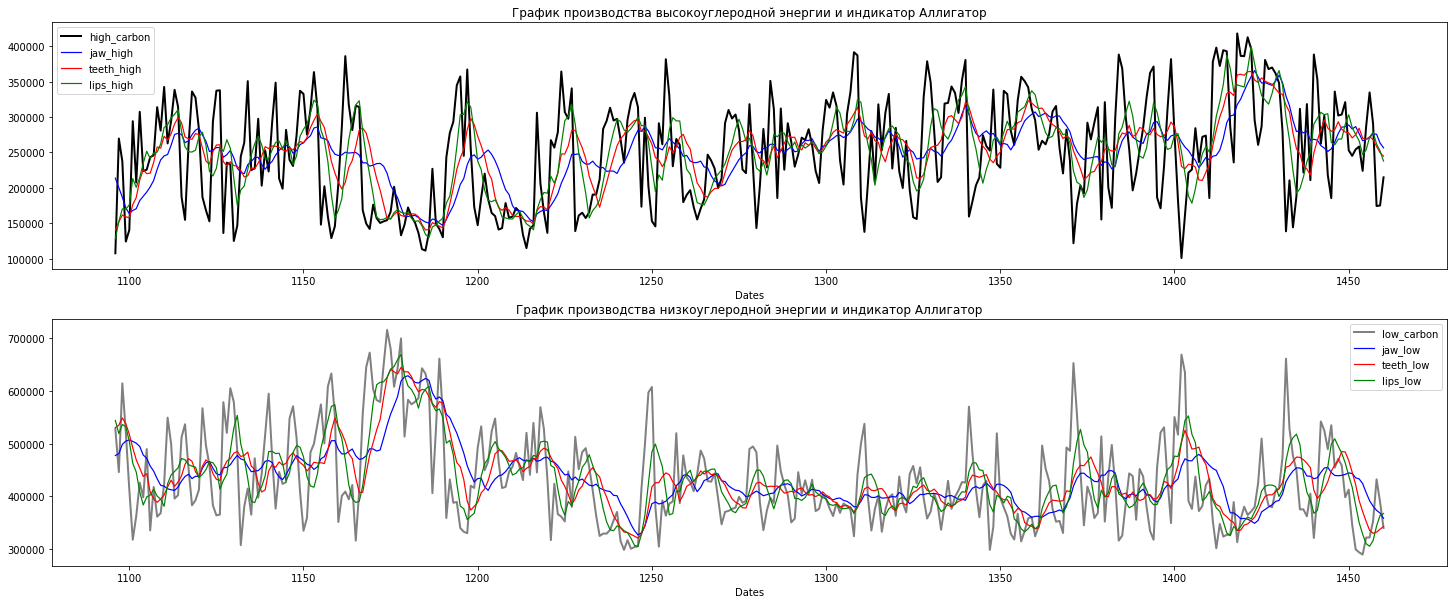

In [ ]:
x = day_energy['day'][1096:]
y = day_energy['high_carbon'][1096:]
y_2 = day_energy['low_carbon'][1096:]
y_3 = day_energy['jaw_high'][1096:]
y_4 = day_energy['teeth_high'][1096:]
y_5 = day_energy['lips_high'][1096:]
y_6 = day_energy['jaw_low'][1096:]
y_7 = day_energy['teeth_low'][1096:]
y_8 = day_energy['lips_low'][1096:]

fig, axes = plt.subplots(figsize = (25, 10), nrows=2, ncols=1)

axes[0].plot(y, linewidth=2.0, label='high_carbon', c='black')
axes[1].plot(y_2, linewidth=2.0, label='low_carbon', c='grey')
axes[0].plot(y_3, linewidth=1.2, label='jaw_high', c='b')
axes[0].plot(y_4, linewidth=1.2, label='teeth_high', c='r')
axes[0].plot(y_5, linewidth=1.2, label='lips_high', c='g')
axes[1].plot(y_6, linewidth=1.2, label='jaw_low', c='b')
axes[1].plot(y_7, linewidth=1.2, label='teeth_low', c='r')
axes[1].plot(y_8, linewidth=1.2, label='lips_low', c='g')

axes[0].set_xlabel('Dates')
axes[1].set_xlabel('Dates')

axes[0].get_yticklabels()
axes[1].get_yticklabels()

axes[0].set_title('График производства высокоуглеродной энергии и индикатор Аллигатор')
axes[1].set_title('График производства низкоуглеродной энергии и индикатор Аллигатор')

axes[0].legend()
axes[1].legend()

plt.show()

Диаграмма 11. Индикатор Аллигатор Билла Вильямса для месячного графика генерации энергии

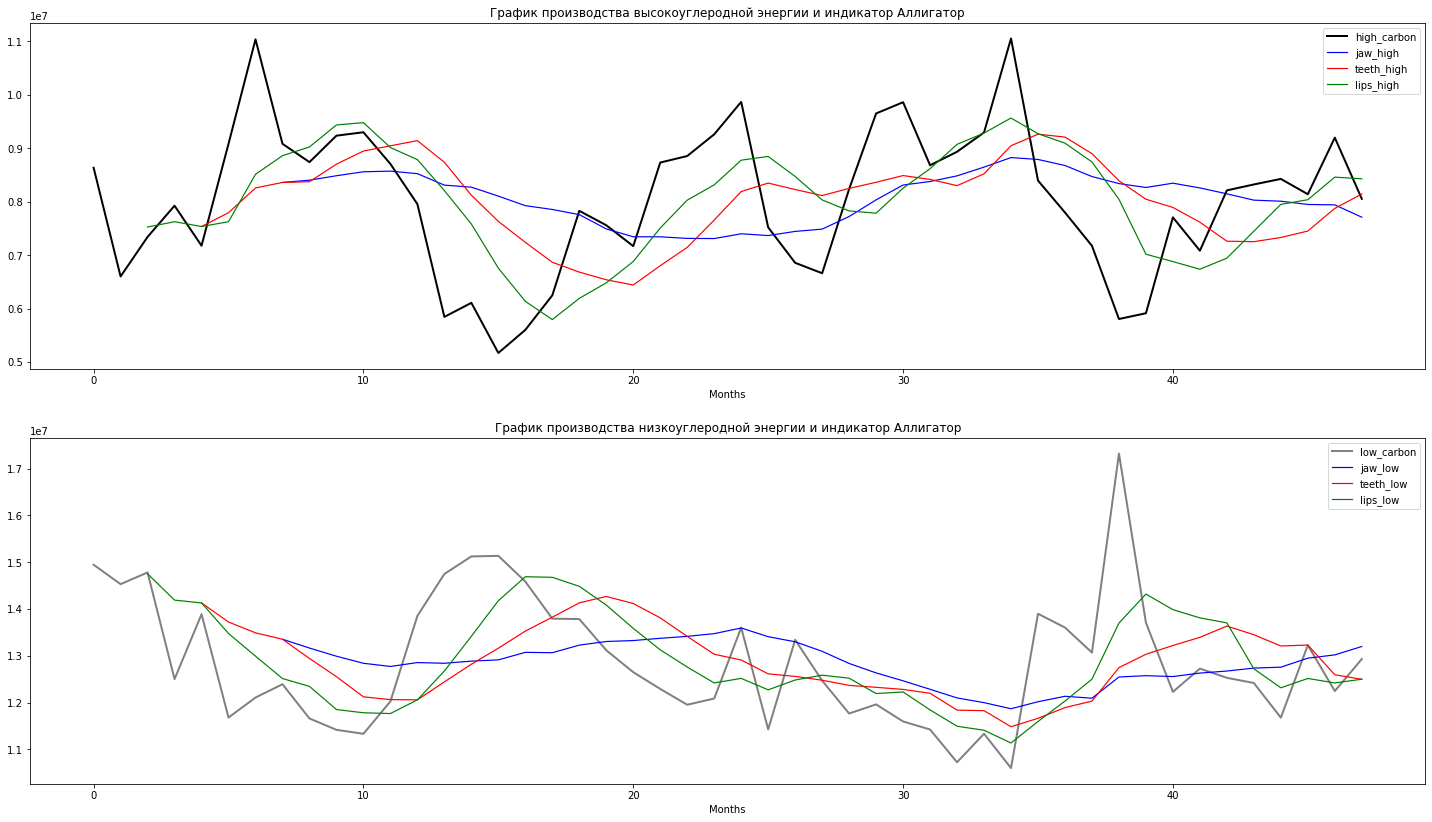

In [ ]:
x = month_energy['month']
y = month_energy['high_carbon']
y_2 = month_energy['low_carbon']
y_3 = month_energy['jaw_high']
y_4 = month_energy['teeth_high']
y_5 = month_energy['lips_high']
y_6 = month_energy['jaw_low']
y_7 = month_energy['teeth_low']
y_8 = month_energy['lips_low']

fig, axes = plt.subplots(figsize = (25, 14), nrows=2, ncols=1)

axes[0].plot(y, linewidth=2.0, label='high_carbon', c='black')
axes[1].plot(y_2, linewidth=2.0, label='low_carbon', c='grey')
axes[0].plot(y_3, linewidth=1.2, label='jaw_high', c='b')
axes[0].plot(y_4, linewidth=1.2, label='teeth_high', c='r')
axes[0].plot(y_5, linewidth=1.2, label='lips_high', c='g')
axes[1].plot(y_6, linewidth=1.2, label='jaw_low', c='b')
axes[1].plot(y_7, linewidth=1.2, label='teeth_low', c='r')
axes[1].plot(y_8, linewidth=1.2, label='lips_low', c='g')

axes[0].set_xlabel('Months')
axes[1].set_xlabel('Months')

axes[0].get_yticklabels()
axes[1].get_yticklabels()

axes[0].set_title('График производства высокоуглеродной энергии и индикатор Аллигатор')
axes[1].set_title('График производства низкоуглеродной энергии и индикатор Аллигатор')

axes[0].legend()
axes[1].legend()

plt.show()

Комментарии к диаграммам 11 и 12. Переплетение скользящих средних означает консолидацию рынка,
что мы и видим для каждого из рассматриваемых показателей. При подобном расположении элементов
индикатора можно ожидать лишь дальнейшее горизонтальное движение показателей.

https://bcs-express.ru/novosti-i-analitika/alligator-kak-khishchnyi-indikator-mozhet-pomoch-treideru

2.2.5. Построение модели ARIMA с помощью функции auto_arima библиотеки pmdarima для прогнозирования временных рядов генерации электроэнергии из высокоуглеродных и низкоуглеродных источников

In [ ]:
# Для построения модели ARIMA воспользуемся датафреймом day_energy с сгруппированными 
# значениями источников в high_carbon и low_carbon:

# day_energy
for_forecast = day_energy[['day', 'high_carbon', 'low_carbon']]
y_h = for_forecast['high_carbon']
y_l = for_forecast['low_carbon']

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 9.8 MB 37.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
%matplotlib inline

import pmdarima as pm
print(f"Using pmdarima {pm.__version__}")

Using pmdarima 1.8.4


Диаграмма 12. Изучение данных для построения модели ARIMA

/usr/local/lib/python3.7/dist-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


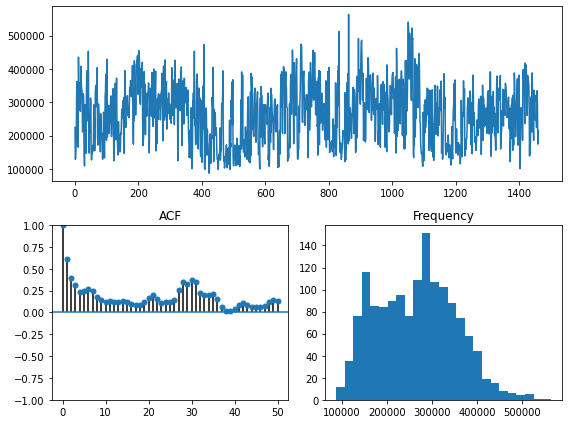

In [ ]:
from pmdarima.utils import tsdisplay # утилита для визуализации временных рядов

tsdisplay(y_h) # for high_carbon

# tsdisplay представляет сам временной ряд, гистограмму и 
# график автокорреляции, что позволяет оценить диапазон распределения величин,
# характер распределения - несколько несимметричное, отклоняющееся от нормального,
# и график ACF, показывающий наличие положительной автокорреляции, что вызывает
# необходимость дифференцирования числового ряда

tsdisplay представляет сам временной ряд, гистограмму и 
график автокорреляции, что позволяет оценить диапазон распределения величин,
характер распределения - несколько несимметричное, отклоняющееся от нормального,
и график ACF, показывающий наличие положительной автокорреляции, что вызывает
необходимость дифференцирования числового ряда

Если уже на этом этапе воспользоваться автоматической функцией auto_arima(),
она самостоятельно подберет необходимые параметры (p, d, q) для 
дальнейшего анализа

In [ ]:
from pmdarima.model_selection import train_test_split
from pmdarima.arima import StepwiseContext

# разделение временного ряда на train и test

train_h, test_h = for_forecast['high_carbon'][:1096], for_forecast['high_carbon'][1096:]

auto_h = pm.auto_arima(train_h, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27570.340, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27817.701, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27760.671, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27701.642, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27815.703, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27581.870, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27578.780, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27571.941, Time=1.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27574.755, Time=2.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27578.519, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27587.796, Time=0.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27576.991, Time=0.86 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=27569.211, Time=3.61 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=27554.348, Time=4.17 sec
 ARIMA(4,1,2)(0,0,0

In [ ]:
auto_h.summary() # подводит итоги применения автоматической модели

# важнейшее значение здесь имеют параметры модели:
# p = 4, d = 1, q = 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1096
Model:               SARIMAX(4, 1, 3)   Log Likelihood              -13766.884
Date:                Wed, 12 Jan 2022   AIC                          27549.769
Time:                        08:03:29   BIC                          27589.757
Sample:                             0   HQIC                         27564.900
                               - 1096                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1795      0.028      6.434      0.000       0.125       0.234
ar.L2         -0.7318      0.026    -27.891      0.000      -0.783      -0.680
ar.L3          0.5771      0.024     23.891      0.000       0.530       0.624
ar.L4         -0.0202      0.027     -0.744      0.457      -0.074       0.033
ma.L1         -0.5979      0.015    -39.016      0.000      -0.628      -0.568
ma.L2          0.5931      0.019     31.614      0.000       0.556       0.630
ma.L3         -0.9501      0.016    -61.034      0.000      -0.981      -0.920
sigma2      5.102e+09   3.25e-12   1.57e+21      0.000     5.1e+09     5.1e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                65.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.56e+35. Standard errors may be unstable.
"""

auto_h.summary() - подводит итоги применения автоматической модели

важнейшее значение здесь имеют параметры модели:
p = 4, d = 1, q = 3


Продолжая использование автоматической функции, можно протестировать
наши модели на отложенных наборах даных и измерить ошибку прогнозов:

для high_carbon:

импортируем метрики качества:

In [ ]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

from math import sqrt

model_h = auto_h  

def forecast_one_step():
    """
    the function predicts each next value of the series
    """
    fc, conf_int = model_h.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

# создаем списки прогнозных значений и их доверительных интервалов
for el in test_h:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

# одновременно коррегируя модель к каждому новому тестовому значению

    model_h.update(el)

# получаем метрики качества прогноза

print(f'RMSE: {sqrt(mean_squared_error(test_h, forecasts))}')
print(f'SMAPE: {smape(test_h, forecasts)}')

RMSE: 60110.468372322524
SMAPE: 19.96971175899886


Диаграмма 13. Реальные значения производства высокоуглеродной энергии и
результаты предиктивной модели

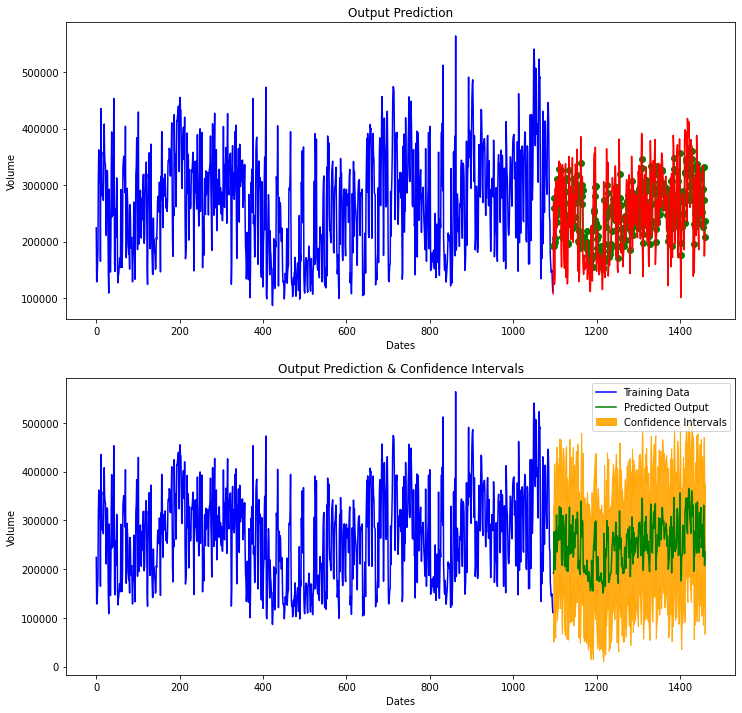

In [ ]:
# строим графики реальных и предсказанных значений ряда 

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# данные реальные и предсказанные

axes[0].plot(train_h, color='blue', label='Training Data')
axes[0].plot(test_h.index, forecasts, color='green', marker='o',
             label='Predicted Output')

axes[0].plot(test_h.index, test_h, color='red', label='Real Production Volume')
axes[0].set_title('Output Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Volume')

# предиктивные данные с доверительными интервалами

axes[1].plot(train_h, color='blue', label='Training Data')
axes[1].plot(test_h.index, forecasts, color='green',
             label='Predicted Output')

axes[1].set_title('Output Prediction & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Volume')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(test_h.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].legend()



Для того, чтобы сформировать прогноз будущих значений,
обратимся к функции ARIMA(), подавая в качестве параметров для обучения
значения всего временнного ряда

In [ ]:
arima_h = pm.ARIMA(order=(4, 1, 3), seasonal_order=(0, 0, 0, 0))
arima_h.fit(y_h)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(4, 1, 3))

В качестве эксперимента, используя метод predict в модели arima_h,
предпримем попытку предсказания будущих значений временного ряда

In [ ]:
preds_h, conf_int_h = arima_h.predict(n_periods=365, return_conf_int=True)

In [ ]:
preds_h

array([246238.98517758, 245100.53216929, 256084.00209021, 273886.35807598,
       266342.12697743, 257170.45224734, 270271.10061043, 274555.99068079,
       260515.49734009, 262099.71420365, 274694.5951647 , 267772.77477035,
       258253.77613299, 268454.65574127, 273078.45045004, 261107.16080278,
       261248.9173628 , 272321.5815059 , 267338.4848914 , 258453.71573699,
       266525.77189602, 271405.15055053, 261363.07646942, 260470.64674605,
       270118.92819124, 266706.82445083, 258543.14912568, 264817.34980051,
       269741.02811509, 261401.15387939, 259771.06071467, 268091.8521339 ,
       265927.80847138, 258524.59684482, 263293.9535439 , 268104.62098616,
       261250.84643419, 259121.89159443, 266224.43876531, 265035.33362513,
       258399.60942214, 261922.59571751, 266507.95805152, 260938.824283  ,
       258500.74485679, 264500.3196031 , 264057.51637232, 258172.3661893 ,
       260674.66594933, 264958.72639023, 260489.32415953, 257890.36550907,
       262903.3510763 , 2

In [ ]:
conf_int_h

результат эксперимента:

прогнозное значение высокоуглеродной генерации на 21.12.2019 = 218029.5350706
при значениях доверительного интервала - -3.20498466e+04,  4.68108917e+05

array([[ 1.10751345e+05,  3.81726625e+05],
       [ 8.83749580e+04,  4.01826106e+05],
       [ 9.21649848e+04,  4.20003019e+05],
       [ 1.06780185e+05,  4.40992531e+05],
       [ 9.85052643e+04,  4.34178990e+05],
       [ 8.89957497e+04,  4.25345155e+05],
       [ 1.01358130e+05,  4.39184071e+05],
       [ 1.05205215e+05,  4.43906767e+05],
       [ 9.10683908e+04,  4.29962604e+05],
       [ 9.23373061e+04,  4.31862122e+05],
       [ 1.04361877e+05,  4.45027313e+05],
       [ 9.72663211e+04,  4.38279228e+05],
       [ 8.76177972e+04,  4.28889755e+05],
       [ 9.73272259e+04,  4.39582086e+05],
       [ 1.01575272e+05,  4.44581629e+05],
       [ 8.95009054e+04,  4.32713416e+05],
       [ 8.93694395e+04,  4.33128395e+05],
       [ 9.99265872e+04,  4.44716576e+05],
       [ 9.47458980e+04,  4.39931072e+05],
       [ 8.57253815e+04,  4.31182050e+05],
       [ 9.33622297e+04,  4.39689314e+05],
       [ 9.78665607e+04,  4.44943740e+05],
       [ 8.77002401e+04,  4.35025913e+05],
       [ 8.

результат эксперимента:

прогнозное значение высокоуглеродной генерации на 21.12.2019 = 218029.5350706
при значениях доверительного интервала - -3.20498466e+04,  4.68108917e+05

Визуализация прогноза будущих значений (в качестве эксперимента)

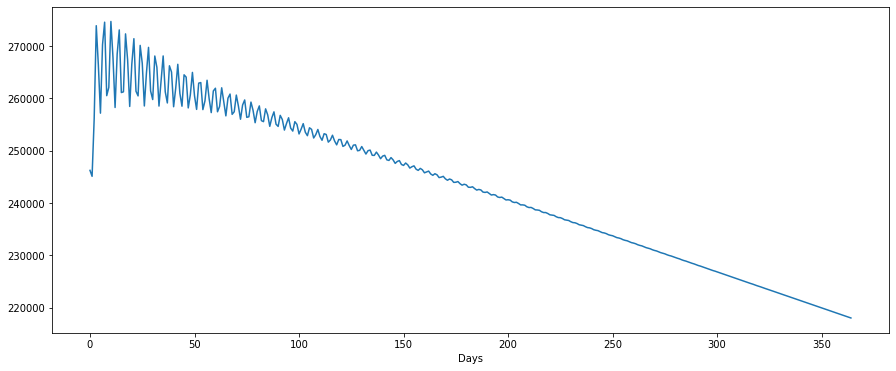

In [ ]:
y = preds_h

x = np.arange(365)  

fig, ax = plt.subplots(figsize = (15, 6))

ax.set_xlabel('Days')

ax.plot(y)


аналогично для low_carbon

Диаграмма 14. Изучение данных для построения модели ARIMA


/usr/local/lib/python3.7/dist-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


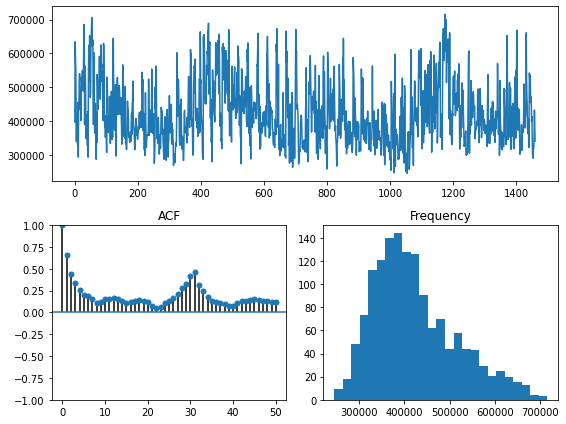

In [ ]:
tsdisplay(y_l)



tsdisplay представляет сам временной ряд, гистограмму и 
график автокорреляции, что позволяет оценить диапазон распределения величин,
характер распределения - несколько несимметричное, отклоняющееся от нормального,
и график ACF, показывающий наличие положительной автокорреляции, что вызывает
необходимость дифференцирования числового ряда

In [ ]:
train_l, test_l = for_forecast['low_carbon'][:1096], for_forecast['low_carbon'][1096:]

auto_l = pm.auto_arima(train_l, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27558.220, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27767.443, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27722.921, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27693.712, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27765.447, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27561.300, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27556.330, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27554.986, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27626.780, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27681.740, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=27553.041, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=27691.709, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=27720.916, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=27554.355, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
auto_l.summary() # подводит итоги применения автоматической модели

# важнейшее значение здесь имеют параметры модели:
# p = 1, d = 1, q = 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1096
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -13772.105
Date:                Wed, 12 Jan 2022   AIC                          27552.210
Time:                        08:07:40   BIC                          27572.204
Sample:                             0   HQIC                         27559.775
                               - 1096                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5738      0.044     13.170      0.000       0.488       0.659
ma.L1         -0.9627      0.049    -19.824      0.000      -1.058      -0.868
ma.L2         -0.0110      0.044     -0.249      0.803      -0.098       0.076
sigma2      5.277e+09   2.94e-12   1.79e+21      0.000    5.28e+09    5.28e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               277.09
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.85
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+37. Standard errors may be unstable.
"""

auto_l.summary() подводит итоги применения автоматической модели

важнейшее значение здесь имеют параметры модели:
p = 1, d = 1, q = 2

In [ ]:
model_l = auto_l  

def forecast_one_step():
    fc, conf_int = model_l.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test_l:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    model_l.update(new_ob)

print(f'RMSE: {sqrt(mean_squared_error(test_l, forecasts))}')
print(f'SMAPE: {smape(test_l, forecasts)}')

RMSE: 65759.6823553497
SMAPE: 11.564245365507114


Диаграмма 15. Реальные значения производства низкоуглеродной энергии и
результаты предиктивной модели

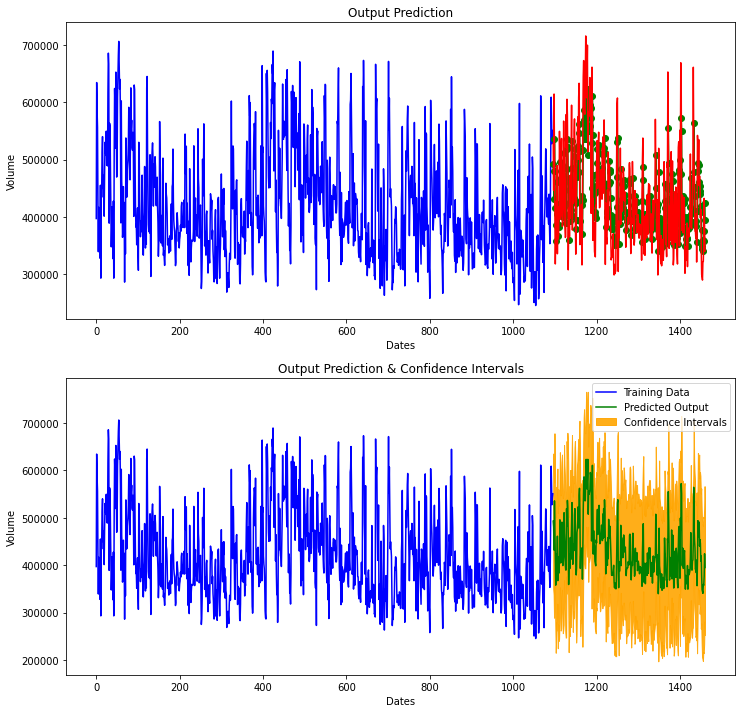

In [ ]:
# построение линейных графиков 

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# данные реальные и предсказанные

axes[0].plot(train_l, color='blue', label='Training Data')
axes[0].plot(test_l.index, forecasts, color='green', marker='o',
             label='Predicted Output')

axes[0].plot(test_l.index, test_l, color='red', label='Real Production Volume')
axes[0].set_title('Output Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Volume')

# предиктивные данные с доверительными интервалами

axes[1].plot(train_l, color='blue', label='Training Data')
axes[1].plot(test_l.index, forecasts, color='green',
             label='Predicted Output')

axes[1].set_title('Output Prediction & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Volume')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(test_l.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].legend()

Для того, чтобы сформировать прогноз будущих значений,
обратимся к функции ARIMA(), подавая в качестве параметров для обучения
значения всего временнного ряда

In [ ]:
arima_l = pm.ARIMA(order=(1, 1, 2), seasonal_order=(0, 0, 0, 0))
arima_l.fit(y_l)

ARIMA(order=(1, 1, 2))

В качестве эксперимента, используя метод predict в модели arima_l,
предпримем попытку предсказания будущих значений временного ряда

In [ ]:
preds_l, conf_int_l = arima_l.predict(n_periods=365, return_conf_int=True)

In [ ]:
preds_l

array([362056.31328741, 376545.94129768, 384240.11339326, 388274.52320552,
       390337.93060993, 391339.83450918, 391770.05483921, 391892.38913616,
       391848.90826108, 391716.12592923, 391535.24938452, 391328.47120958,
       391107.74344677, 390879.50299075, 390647.21649697, 390412.75096816,
       390177.11189776, 389940.84080453, 389704.22932894, 389467.43453695,
       389230.54101803, 388993.59432873, 388756.61900396, 388519.62825727,
       388282.62920496, 388045.62567955, 387808.61974513, 387571.6125133 ,
       387334.60458273, 387097.59627586, 386860.58776633, 386623.57914765,
       386386.57047018, 386149.56176106, 385912.55303489, 385675.54429953,
       385438.53555923, 385201.52681627, 384964.51807187, 384727.5093267 ,
       384490.50058112, 384253.49183531, 384016.48308938, 383779.47434338,
       383542.46559735, 383305.4568513 , 383068.44810524, 382831.43935918,
       382594.43061311, 382357.42186704, 382120.41312097, 381883.4043749 ,
       381646.39562883, 3

In [ ]:
conf_int_l


array([[221963.72644573, 502148.9001291 ],
       [210921.52495137, 542170.35764399],
       [210496.21172128, 557984.01506523],
       [211390.37493635, 565158.67147469],
       [211992.66485326, 568683.1963666 ],
       [212168.88178039, 570510.78723797],
       [212040.05669629, 571500.05298214],
       [211725.43763141, 572059.3406409 ],
       [211304.70130207, 572393.11522009],
       [210825.22065288, 572607.03120559],
       [210313.80602904, 572756.69274   ],
       [209785.27605672, 572871.66636244],
       [209247.72339332, 572967.76350023],
       [208705.5395395 , 573053.46644201],
       [208161.09915092, 573133.33384302],
       [207615.68348053, 573209.81845579],
       [207069.98262309, 573284.24117243],
       [206524.36752668, 573357.31408237],
       [205979.03698156, 573429.42167631],
       [205434.09695412, 573500.77211977],
       [204889.603378  , 573571.47865807],
       [204345.5852266 , 573641.60343085],
       [203802.05695121, 573711.18105671],
       [203


Результат эксперимента:

прогнозное значение низкоуглеродной генерации на 21.12.2019 = 307699.66685454
при значениях доверительного интервала - 37595.14269409, 577804.19101499

Строим график прогнозных значений

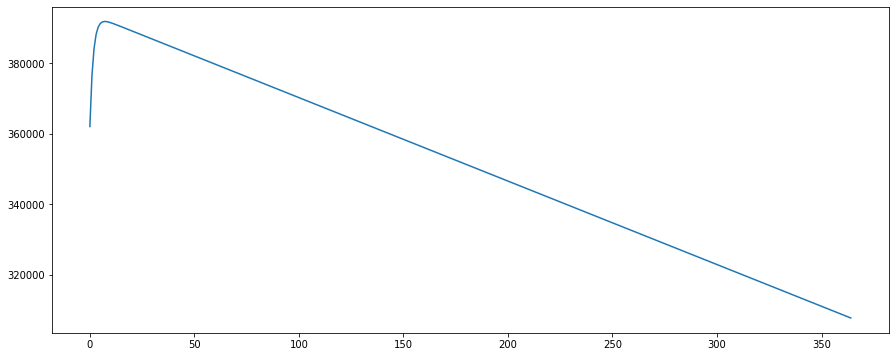

In [ ]:
y = preds_l

x = np.arange(365)  

fig, ax = plt.subplots(figsize = (15, 6))

ax.plot(y)

Построение моделей прогноза цены на электроэнергию

1. Модель линейной регрессии

Готовим датафреймы к построению модели:

определяем общую генерацию энергии

In [ ]:
energy_spain.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation fossil oil shale',
       'generation fossil peat', 'generation geothermal',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual', 'day', 'month',
       'year'],
      dtype='object')

In [ ]:
energy_spain['total generation'] = energy_spain[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation fossil oil shale',
       'generation fossil peat', 'generation geothermal',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore']].sum(axis=1)

из датафрейма energy_spain выделяем необходимые для модели предикторы:

In [ ]:
for_modeling = energy_spain[['time', 'total generation', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price actual']]

for_modeling

,time,total generation,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual
0,2015-01-01 00:00:00+01:00,28251.0,17.0,6436.0,26118.0,25385.0,65.41
1,2015-01-01 01:00:00+01:00,27818.0,16.0,5856.0,24934.0,24382.0,64.92
2,2015-01-01 02:00:00+01:00,26796.0,8.0,5454.0,23515.0,22734.0,64.48
3,2015-01-01 03:00:00+01:00,25223.0,2.0,5151.0,22642.0,21286.0,59.32
4,2015-01-01 04:00:00+01:00,24620.0,9.0,4861.0,21785.0,20264.0,56.04
...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,26415.0,96.0,3253.0,30619.0,30653.0,77.02
35060,2018-12-31 20:00:00+01:00,25213.0,51.0,3353.0,29932.0,29735.0,76.16
35061,2018-12-31 21:00:00+01:00,23987.0,36.0,3404.0,27903.0,28071.0,74.30
35062,2018-12-31 22:00:00+01:00,22748.0,29.0,3273.0,25450.0,25801.0,69.89


готовим для моделирования датафрейм weather

отфильтруем необходимые столбцы

In [ ]:
weather = weather[['dt_iso', 'city_name', 'temp', 'pressure',
       'humidity', 'wind_speed', 'wind_deg']]

weather['city_name'].value_counts()

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64

Датафрейм включает в себя погодные данные по пяти городам,
но необходимо выбрать данные по одному городу - Мадриду

In [ ]:
madrid = weather.loc[weather['city_name'] == 'Madrid']
madrid

,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg
35145,2015-01-01 00:00:00+01:00,Madrid,267.325,971,63,1,309
35146,2015-01-01 01:00:00+01:00,Madrid,267.325,971,63,1,309
35147,2015-01-01 02:00:00+01:00,Madrid,266.186,971,64,1,273
35148,2015-01-01 03:00:00+01:00,Madrid,266.186,971,64,1,273
35149,2015-01-01 04:00:00+01:00,Madrid,266.186,971,64,1,273
...,...,...,...,...,...,...,...
71407,2018-12-31 19:00:00+01:00,Madrid,283.560,1030,88,1,280
71408,2018-12-31 20:00:00+01:00,Madrid,280.120,1031,52,1,260
71409,2018-12-31 21:00:00+01:00,Madrid,278.150,1030,65,1,340
71410,2018-12-31 22:00:00+01:00,Madrid,276.570,1031,69,2,340


готовим данные к моделированию: объединяем датафреймы, определяем зависимые и незавизимые переменные,
разделяем датафрейм на обучающую и тестовую выборки случайным образом

In [ ]:
for_modeling_ = for_modeling.merge(madrid, how='left', left_on='time', right_on='dt_iso')
for_modeling_.dropna(inplace=True)
for_modeling_

,time,total generation,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price actual,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg
0,2015-01-01 00:00:00+01:00,28251.0,17.0,6436.0,26118.0,25385.0,65.41,2015-01-01 00:00:00+01:00,Madrid,267.325,971,63,1,309
1,2015-01-01 01:00:00+01:00,27818.0,16.0,5856.0,24934.0,24382.0,64.92,2015-01-01 01:00:00+01:00,Madrid,267.325,971,63,1,309
2,2015-01-01 02:00:00+01:00,26796.0,8.0,5454.0,23515.0,22734.0,64.48,2015-01-01 02:00:00+01:00,Madrid,266.186,971,64,1,273
3,2015-01-01 03:00:00+01:00,25223.0,2.0,5151.0,22642.0,21286.0,59.32,2015-01-01 03:00:00+01:00,Madrid,266.186,971,64,1,273
4,2015-01-01 04:00:00+01:00,24620.0,9.0,4861.0,21785.0,20264.0,56.04,2015-01-01 04:00:00+01:00,Madrid,266.186,971,64,1,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36262,2018-12-31 19:00:00+01:00,26415.0,96.0,3253.0,30619.0,30653.0,77.02,2018-12-31 19:00:00+01:00,Madrid,283.560,1030,88,1,280
36263,2018-12-31 20:00:00+01:00,25213.0,51.0,3353.0,29932.0,29735.0,76.16,2018-12-31 20:00:00+01:00,Madrid,280.120,1031,52,1,260
36264,2018-12-31 21:00:00+01:00,23987.0,36.0,3404.0,27903.0,28071.0,74.30,2018-12-31 21:00:00+01:00,Madrid,278.150,1030,65,1,340
36265,2018-12-31 22:00:00+01:00,22748.0,29.0,3273.0,25450.0,25801.0,69.89,2018-12-31 22:00:00+01:00,Madrid,276.570,1031,69,2,340


In [ ]:
X, y = for_modeling_.drop(['time', 'dt_iso', 'city_name', 'price actual'], 1), for_modeling_['price actual']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Создаем модель линейной регрессии и оцениваем ее результаты

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
regression = LinearRegression()

model = regression.fit(X_train, y_train)
model.score(X_test, y_test)

0.31187949775152124

In [ ]:
y_predict = regression.predict(X_test)

In [ ]:
y_true = y_test
y_pred = y_predict

In [ ]:
from numpy import sqrt 

RMSE = sqrt(mean_squared_error(y_true, y_pred))
RMSE

11.737636816505695

In [ ]:
for_modeling_['price actual'].mean()

58.04031736840694

Построенная модель прогноза цены и обученная на наших данных модель линейной регрессии показала довольно посредственные результаты, как scoring модели по r2_score, так и RMSE свидетельствуют о низком качестве модели.

2. Построение модели Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

создаем и тестируем модель RandomForestRegressor

In [ ]:
regr = RandomForestRegressor()

regr.fit(X, y)
regr.score(X, y)


0.9487953324512807

In [ ]:
y_pred = regr.predict(X)

In [ ]:
y_true = y

RMSE = sqrt(mean_squared_error(y_true, y_pred))
RMSE

3.213458723787507

Модель прогноза цены на основе алгоритма RandomForestRegressor получила достаточно хорошие оценки качества прогноза.

3. Построение модели XGBRegressor

In [ ]:
!pip install xgboost==1.1.1

     |████████████████████████████████| 127.6 MB 20 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# используем параметры для моделирования XGBoost, предложенные J.Brownlee в https://machinelearningmastery.com/xgboost-for-regression/

xgb_model.fit(X, y)
xgb_model.score(X, y)

0.9366690250631801

In [ ]:
y_pred = xgb_model.predict(X)

In [ ]:
y_true = y

RMSE = sqrt(mean_squared_error(y_true, y_pred))
RMSE

3.5737653795526674

Последние две модели (RandomForestRegressor и XGBoost), являясь ансамблевыми методами прогнозирования, показали удовлетворительный результат в обучении и тестировании, поэтому можно рекомендовать их к применению для прогнозирования
будущей цены электроэнергии.